# Bharat Intern - ML Internship - Task 1
Develop a machine learning model for predicting house prices using Python,scikit-learn, and TensorFlow.

In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

In [3]:
def load_dataset():
    return pd.read_csv("C:/Users/harsh/OneDrive/Desktop/Bharat Intern/Task - 1/archive (1)/housing.csv")
data = load_dataset()

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Information of data:




In [5]:
def print_shape(data):
  print(data.shape)
print_shape(data)

(20640, 10)


In [6]:
def information_of_data(data):
  print(data.info())
information_of_data(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


# Null value in the data:


In [7]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Encoding

In [8]:
housing_cat = data[["ocean_proximity"]]
encoder = OneHotEncoder()
data_1 = encoder.fit_transform(housing_cat)
data_1.toarray()
data_1 = pd.get_dummies(data['ocean_proximity'])
data = pd.concat([data, data_1], axis=1)
data = data.drop(['ocean_proximity'], axis=1)
data



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [9]:
imputer = SimpleImputer(strategy='median')
x = imputer.fit_transform(data)
data = pd.DataFrame(x, columns=data.columns, index=data.index)

# Data after we filled in null values:


In [10]:
def null_value_in_data(data):
  print(data.isnull().sum())
null_value_in_data(data)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64


In [11]:
def description_of_data(data):
  print(data.describe())
description_of_data(data)

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

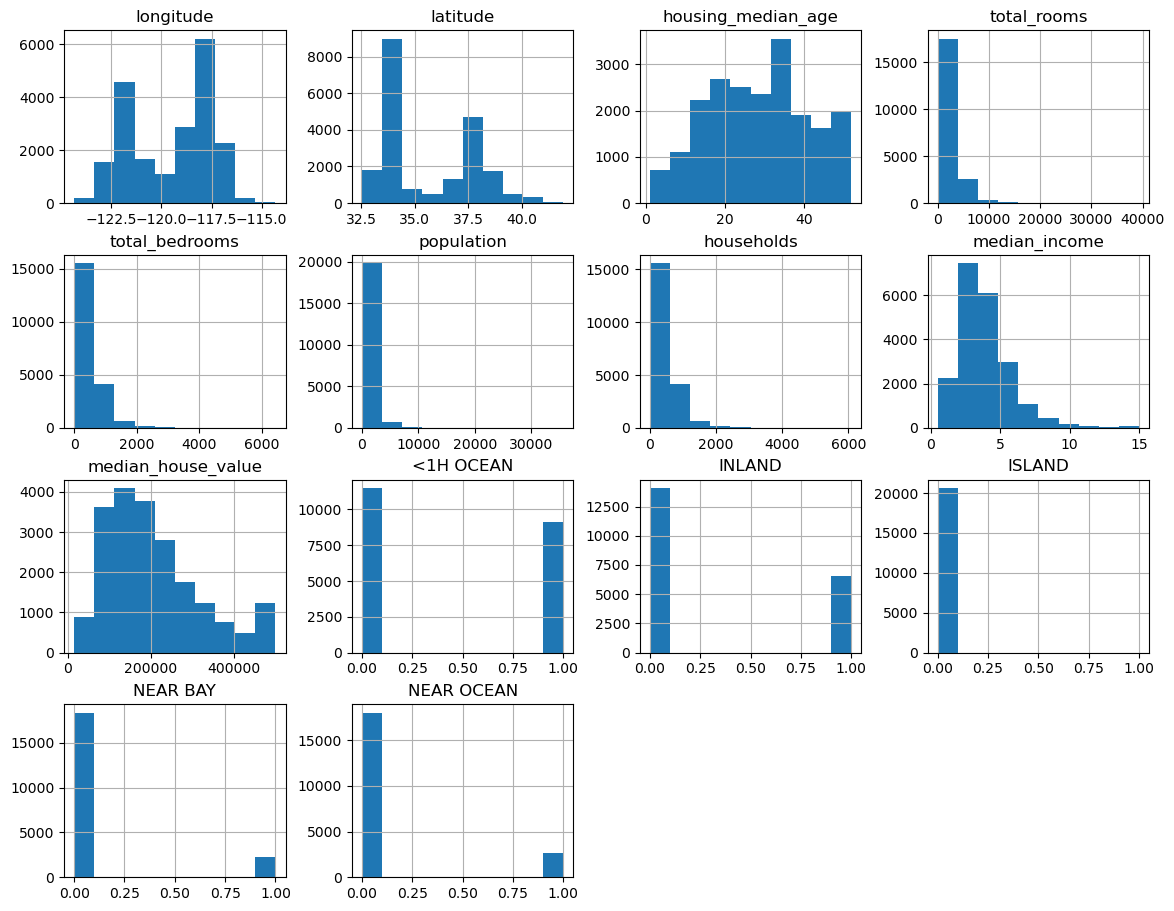

In [12]:
def print_histograms(data):
  data.hist(bins=10,figsize=(14,11))
print_histograms(data)

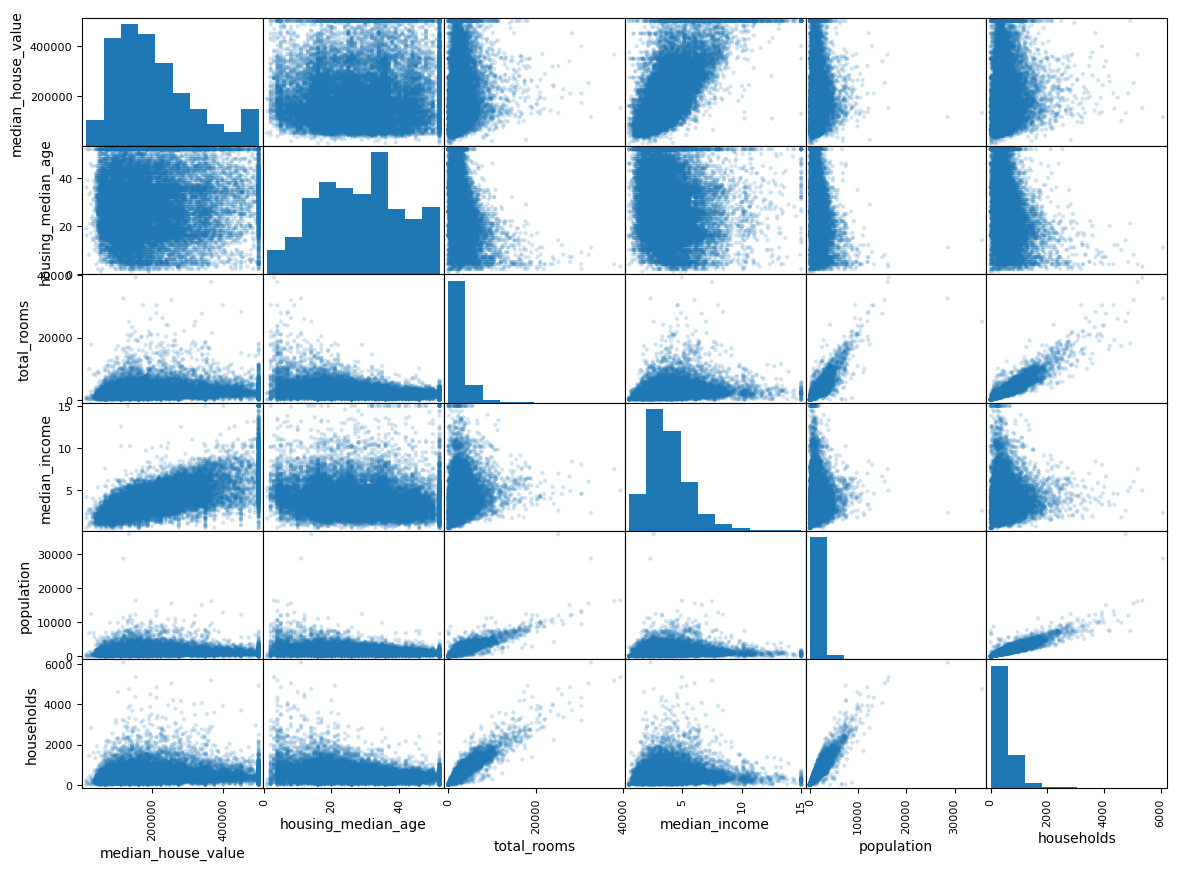

In [13]:
def print_scatter_matrix(data):
  df = data[['median_house_value','housing_median_age','total_rooms','median_income','population','households']]
  pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(14,10))
print_scatter_matrix(data) 

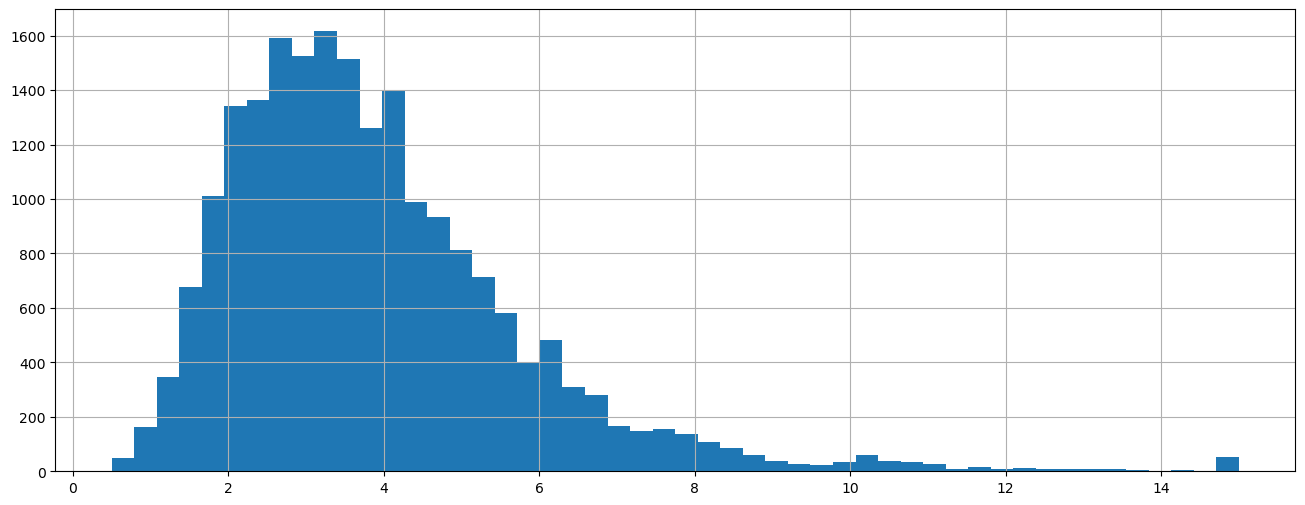

In [14]:
def vizualization_of_median_income(data):
  data['median_income'].hist(bins=50, figsize=(16,6))
  plt.show()
vizualization_of_median_income(data)

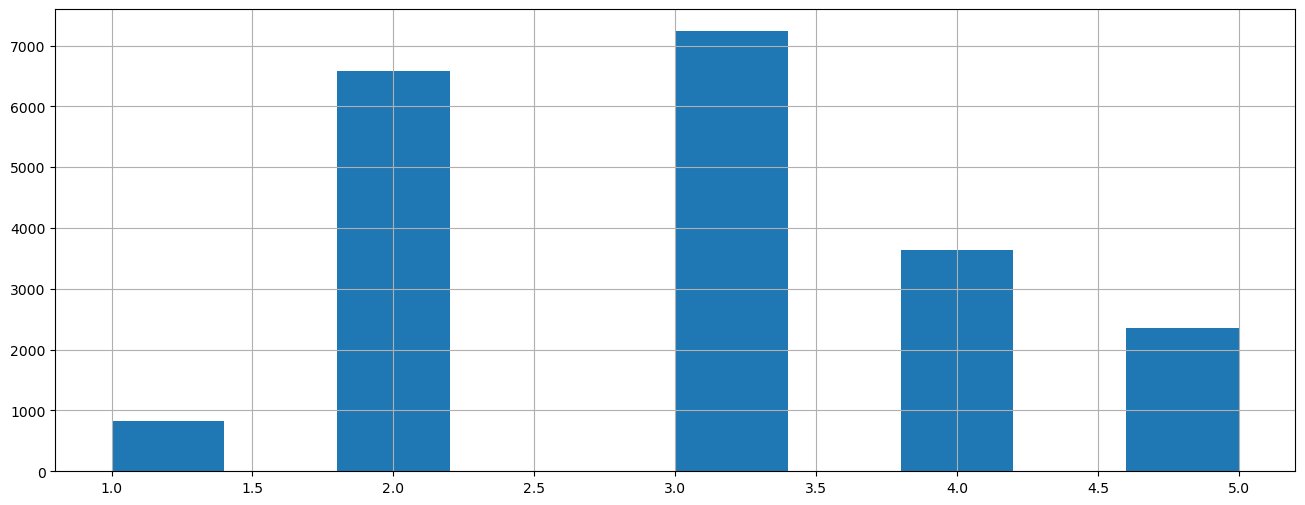

In [15]:
def visualization_of_median_income(df):
  df['income_cat'] = pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])
  df['income_cat'].hist(figsize=(16,6))
  plt.show()
visualization_of_median_income(data)

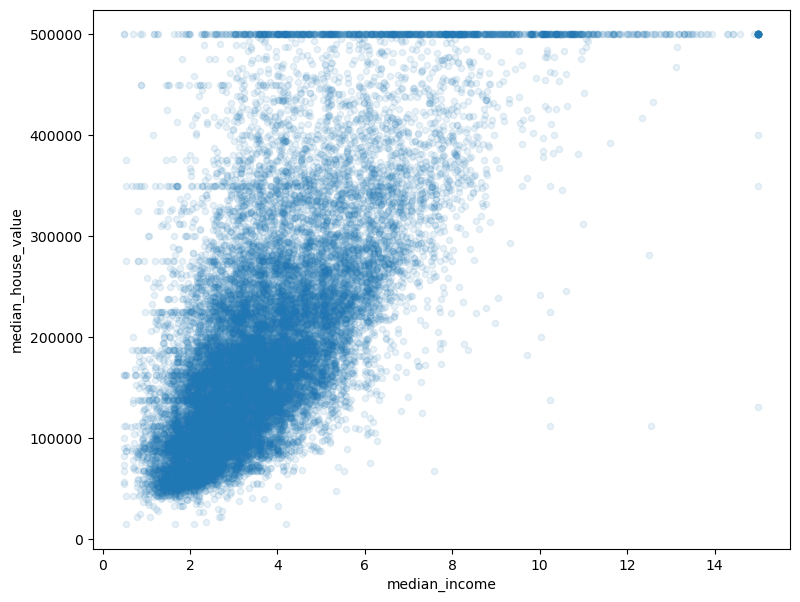

In [16]:
def visualization_of_median_income_and_media_house_value(data):
  data.plot(kind='scatter', x="median_income", y="median_house_value", alpha=0.1, figsize=(9,7))
  plt.show()
visualization_of_median_income_and_media_house_value(data)

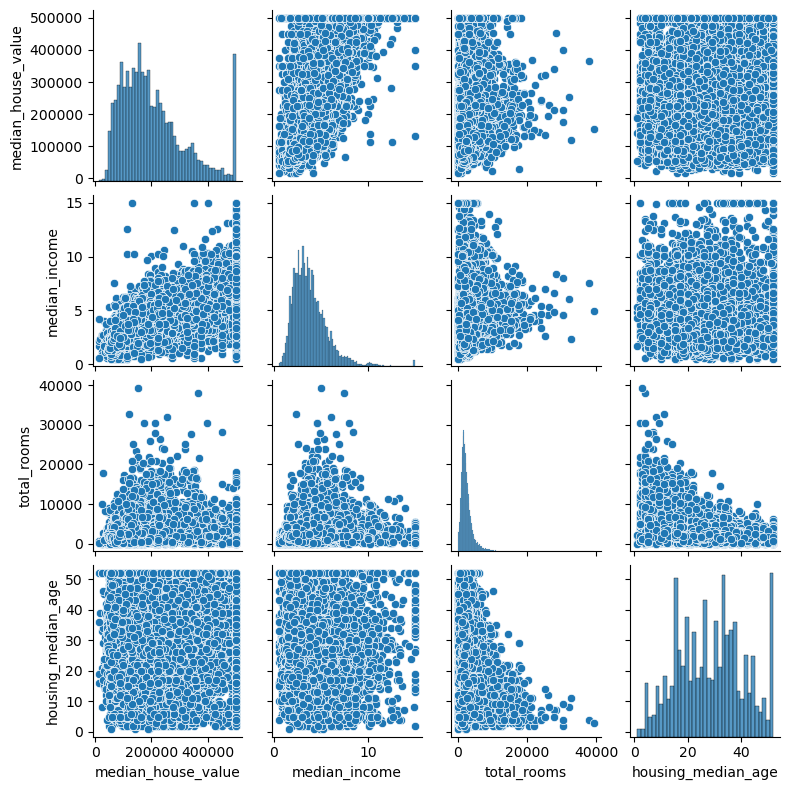

In [17]:
def print_pairplot(data):
  cols = ['median_house_value','median_income','total_rooms','housing_median_age']
  sns.pairplot(data[cols], height=2)
  plt.show()
print_pairplot(data)

# Visualization of population and media house value:




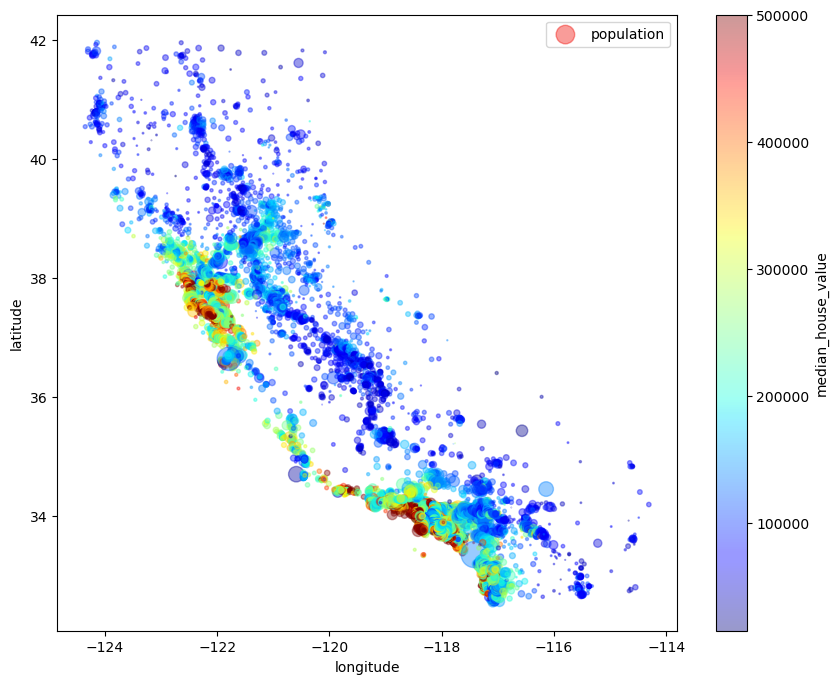

In [18]:
def visualization_of_population_and_media_house_value(housing):
  housing.plot(
      kind="scatter", 
      x="longitude", 
      y="latitude", 
      alpha=0.4,
      s=housing['population']/100,
      label="population",
      c="median_house_value",
      cmap="jet",
      colorbar=True,
      figsize=(10,8)
  )
  plt.show()
visualization_of_population_and_media_house_value(data)

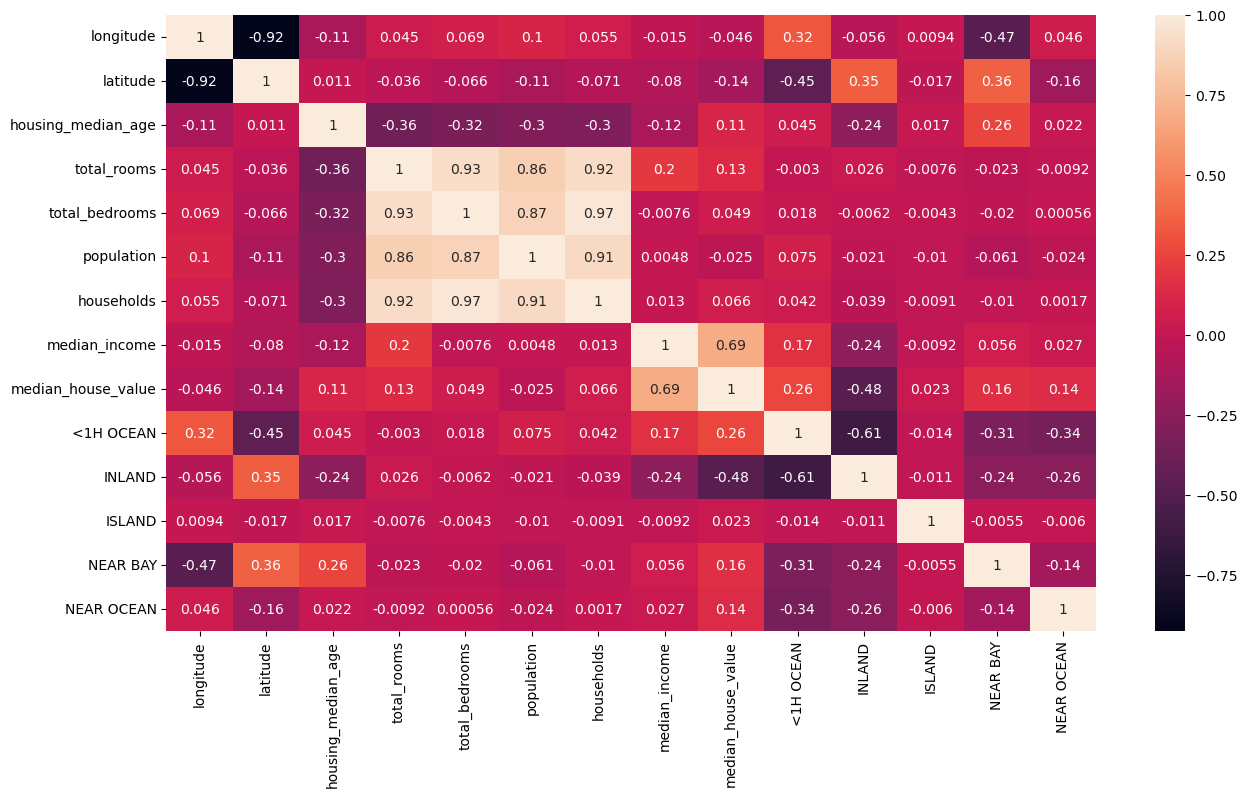

In [19]:
def compute_correlations_matrix_with_seaborn_visualization(data):
  cor=data.corr()
  plt.subplots(figsize=(15,8))
  sns.heatmap(cor,annot=True)
compute_correlations_matrix_with_seaborn_visualization(data)

# Compute correlations price ratio:




In [20]:
def compute_correlations_price_ratio(dataset):
  correlations = dataset.corr()
  res = correlations["median_house_value"].abs().sort_values(ascending=False)
  print(res)
compute_correlations_price_ratio(data)

median_house_value    1.000000
median_income         0.688075
INLAND                0.484859
<1H OCEAN             0.256617
NEAR BAY              0.160284
latitude              0.144160
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
longitude             0.045967
population            0.024650
ISLAND                0.023416
Name: median_house_value, dtype: float64



# Housing fit model prediction:



In [21]:
def housing_fit_model_prediction(data):
  X = data[['median_income', 'INLAND','<1H OCEAN', 'NEAR BAY', 'latitude',
            'NEAR OCEAN', 'total_rooms', 'housing_median_age', 'households']]
  y = data['median_house_value']
  x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 16)
  models = {"KNeighborsRegressor":KNeighborsRegressor(), "LinearRegression":LinearRegression(), 
              "DecisionTreeRegressor":DecisionTreeRegressor(), "LGBMRegressor":LGBMRegressor(n_estimators=1000)}
  print("Models accuracy:")
  for key, model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"{key}: {round(r2_score(y_test,y_pred)*100)}%")
housing_fit_model_prediction(data)

Models accuracy:
KNeighborsRegressor: 9%
LinearRegression: 61%
DecisionTreeRegressor: 45%
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1081
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 9
[LightGBM] [Info] Start training from score 206697.824188
LGBMRegressor: 74%


# New data for predict price:



In [22]:
X = data[['median_income', 'INLAND','<1H OCEAN', 'NEAR BAY', 'latitude','NEAR OCEAN', 'total_rooms', 'housing_median_age', 'households']]
y = data['median_house_value']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 16)
model = LGBMRegressor(n_estimators=1000)
model.fit(x_train,y_train)
data_1 = {'median_income':8.3252, 'INLAND':0.0, '<1H OCEAN':0.0, 'NEAR BAY':1.0, 'latitude':37.88, 'NEAR OCEAN':0.0, 
          'total_rooms':880.0, 'housing_median_age':41.0, 'households':126.0}
test = pd.DataFrame(data_1, index=[1])
test

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1081
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 9
[LightGBM] [Info] Start training from score 206697.824188


,median_income,INLAND,<1H OCEAN,NEAR BAY,latitude,NEAR OCEAN,total_rooms,housing_median_age,households
1,8.3252,0.0,0.0,1.0,37.88,0.0,880.0,41.0,126.0


# Predict housing price:
And finally we set a price on a new home.

In [23]:
price = int(model.predict(test))
print(f"house of Price : {price}$")

house of Price : 462892$


# Conclusion:
If we are given the following house data, median_income’, ‘INLAND’, ‘<1H OCEAN’, ‘NEAR BAY’, ‘latitude’, ‘NEAR OCEAN’, ‘total_rooms’, ‘housing_median_age’, ‘households’ we can predict the price of the house based on the given data